In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Classification

### Supervised machine learning algorithms define models that capture relationships among data. Classification is an area of supervised machine learning that tries to predict which class or category some entity belongs to, based on its features.

For example, you might analyze the employees of some company and try to establish a dependence on the features or variables, such as the level of education, number of years in a current position, age, salary, odds for being promoted, and so on. The set of data related to a single employee is one observation. The features or variables can take one of two forms:

    1. Independent variables, also called inputs or predictors, don’t depend on other features of interest (or at least you assume so for the purpose of the analysis).

    2. Dependent variables, also called outputs or responses, depend on the independent variables.

And there are two main types of classification problems:

    1. Binary or binomial classification: exactly two classes to choose between (usually 0 and 1, true and false, or positive and negative)

    2. Multiclass or multinomial classification: three or more classes of the outputs to choose from



# Logistic Regression 

### Logistic regression is a fundamental classification technique. It belongs to the group of linear classifiers and is somewhat similar to polynomial and linear regression. Logistic regression is fast and relatively uncomplicated, and it’s convenient for you to interpret the results. Although it’s essentially a method for binary classification, it can also be applied to multiclass problems.

![sigmoid function](https://files.realpython.com/media/log-reg-1.e32deaa7cbac.png)

In [3]:
# Get Data
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [12]:
# Create a Model and Train it
# model = LogisticRegression(solver = 'liblinear', random_state = 0)
model = LogisticRegression(solver = 'liblinear', C = 10.0, random_state = 0) # C: strength of regularization
model.fit(x, y)

print(model.classes_)       # represents the array of distinct values that y takes
print(model.intercept_)     # 
print(model.coef_)          # 


[0 1]
[-3.51335372]
[[1.12066084]]


In [13]:
# Evaluate the Model
prediction = model.predict_proba(x)
print(prediction)

[[0.97106534 0.02893466]
 [0.9162684  0.0837316 ]
 [0.7810904  0.2189096 ]
 [0.53777071 0.46222929]
 [0.27502212 0.72497788]
 [0.11007743 0.88992257]
 [0.03876835 0.96123165]
 [0.01298011 0.98701989]
 [0.0042697  0.9957303 ]
 [0.00139621 0.99860379]]


In [14]:
# Evaluate the Model
prediction = model.predict(x)
print(prediction)

[0 0 0 0 1 1 1 1 1 1]


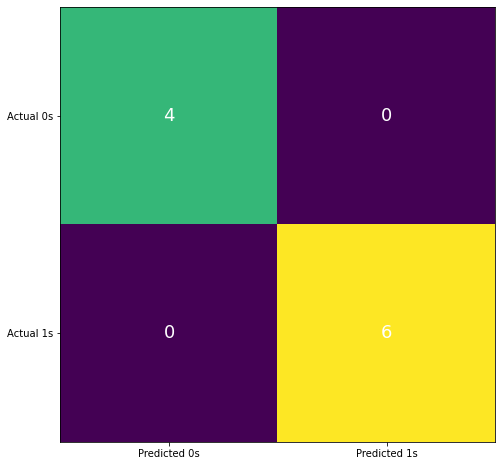

In [15]:
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white', fontsize = 18)

plt.show()

In [16]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



# Handwriting Recognization

### The previous examples illustrated the implementation of logistic regression in Python, as well as some details related to this method. The next example will show you how to use logistic regression to solve a real-world classification problem. The approach is very similar to what you’ve already seen, but with a larger dataset and several additional concerns.

This example is about image recognition. To be more precise, you’ll work on the recognition of handwritten digits. You’ll use a dataset with 1797 observations, each of which is an image of one handwritten digit. Each image has 64 px, with a width of 8 px and a height of 8 px.

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [18]:
# Get Data and Split it
x, y = load_digits(return_X_y = True)
print(x)
print(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


# Standardization

### Standardization is the process of transforming data in a way such that the mean of each column becomes equal to zero, and the standard deviation of each column is one. This way, you obtain the same scale for all columns. Take the following steps to standardize your data:

    1. Calculate the mean and standard deviation for each column.
    2. Subtract the corresponding mean from each element.
    3. Divide the obtained difference by the corresponding standard deviation.

In [19]:
# Scale Data
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)

In [21]:
# Create a Model and Train it
model = LogisticRegression(solver = 'liblinear', C = 0.05, multi_class='ovr', random_state=0) 
# ovr: make the binary fit for each class
# multinomial: applying multinomial loss fit

model.fit(x_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [22]:
# Evaluate the Model
x_test = scalar.transform(x_test)
y_pred = model.predict(x_test)

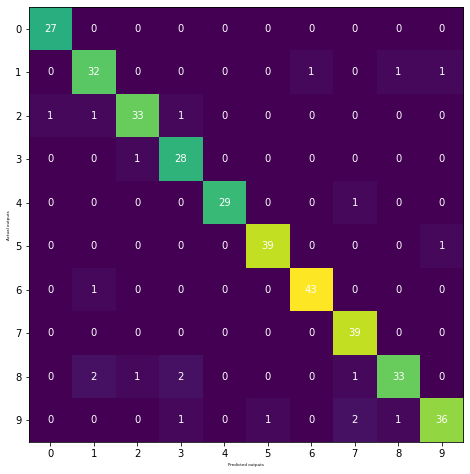

In [24]:
cm = confusion_matrix(y_test, y_pred)
font_size = 4

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=font_size, color='black')
ax.set_ylabel('Actual outputs', fontsize=font_size, color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.89      0.91      0.90        35
           2       0.94      0.92      0.93        36
           3       0.88      0.97      0.92        29
           4       1.00      0.97      0.98        30
           5       0.97      0.97      0.97        40
           6       0.98      0.98      0.98        44
           7       0.91      1.00      0.95        39
           8       0.94      0.85      0.89        39
           9       0.95      0.88      0.91        41

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360

